In [1]:
%pip install -U ipykernel

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install hdfs

Note: you may need to restart the kernel to use updated packages.


In [ ]:

import json
from kafka import KafkaConsumer
from hdfs import InsecureClient

# Create a Kafka consumer
consumer = KafkaConsumer(
    'top10_classical',  # Topic to subscribe to
    bootstrap_servers='localhost:9092',  # Kafka broker address
    value_deserializer=lambda x: x.decode('utf-8'),  # Deserialize message values
    auto_offset_reset='earliest',  # Specify the from beginning of the topic
)

# HDFS client
hdfs_client = InsecureClient('http://localhost:50070', user='hdfs')

# Ensure the directory exists
hdfs_client.makedirs('/kafka/hdfs/spotify_data')

# Function to consume messages and save to HDFS
def consume_messages():
    try:
        with hdfs_client.write('/kafka/hdfs/spotify_data/top10_classical.json', encoding='utf-8', append=True) as writer:
            for msg in consumer:
                # Create a dictionary for the message
                message = {
                    'key': msg.key.decode('utf-8') if msg.key else None,
                    'value': msg.value,
                    'topic': msg.topic,
                    'partition': msg.partition,
                    'offset': msg.offset,
                    'timestamp': msg.timestamp
                }
                # Convert the dictionary to a JSON string
                message_json = json.dumps(message)
                # Print the message
                print(message_json)
                # Write the JSON string to HDFS
                writer.write(message_json + '\n')
    except KeyboardInterrupt:
        pass
    finally:
        # Close the consumer
        consumer.close()

# Start consuming messages
consume_messages()

{"key": null, "value": "{\"track_name\": \"3 Intermezzi, Op. 117: No. 3 in C-Sharp Minor, Andante con moto\", \"artist_names\": [\"Johannes Brahms\", \"Glenn Gould\"], \"available_markets\": [\"AR\", \"AU\", \"AT\", \"BE\", \"BO\", \"BR\", \"BG\", \"CA\", \"CL\", \"CO\", \"CR\", \"CY\", \"CZ\", \"DK\", \"DO\", \"DE\", \"EC\", \"EE\", \"SV\", \"FI\", \"FR\", \"GR\", \"GT\", \"HN\", \"HK\", \"HU\", \"IS\", \"IE\", \"IT\", \"LV\", \"LT\", \"LU\", \"MY\", \"MT\", \"MX\", \"NL\", \"NZ\", \"NI\", \"NO\", \"PA\", \"PY\", \"PE\", \"PH\", \"PL\", \"PT\", \"SG\", \"SK\", \"ES\", \"SE\", \"CH\", \"TW\", \"TR\", \"UY\", \"US\", \"GB\", \"AD\", \"LI\", \"MC\", \"ID\", \"JP\", \"TH\", \"VN\", \"RO\", \"IL\", \"ZA\", \"SA\", \"AE\", \"BH\", \"QA\", \"OM\", \"KW\", \"EG\", \"MA\", \"DZ\", \"TN\", \"LB\", \"JO\", \"PS\", \"IN\", \"BY\", \"KZ\", \"MD\", \"UA\", \"AL\", \"BA\", \"HR\", \"ME\", \"MK\", \"RS\", \"SI\", \"KR\", \"BD\", \"PK\", \"LK\", \"GH\", \"KE\", \"NG\", \"TZ\", \"UG\", \"AG\", \"AM\", 

In [58]:
from hdfs import InsecureClient

hdfs_client = InsecureClient('http://localhost:50070', user='hdfs')
# Read the data.json file from HDFS
with hdfs_client.read('/kafka/hdfs/spotify_data/top10_classical.json', encoding='utf-8') as reader:
    data_from_hdfs = reader.read()

# Print the data read from HDFS
print(data_from_hdfs)

{
    "key": null,
    "value": "{\"track_name\": \"3 Intermezzi, Op. 117: No. 3 in C-Sharp Minor, Andante con moto\", \"artist_names\": [\"Johannes Brahms\", \"Glenn Gould\"], \"available_markets\": [\"AR\", \"AU\", \"AT\", \"BE\", \"BO\", \"BR\", \"BG\", \"CA\", \"CL\", \"CO\", \"CR\", \"CY\", \"CZ\", \"DK\", \"DO\", \"DE\", \"EC\", \"EE\", \"SV\", \"FI\", \"FR\", \"GR\", \"GT\", \"HN\", \"HK\", \"HU\", \"IS\", \"IE\", \"IT\", \"LV\", \"LT\", \"LU\", \"MY\", \"MT\", \"MX\", \"NL\", \"NZ\", \"NI\", \"NO\", \"PA\", \"PY\", \"PE\", \"PH\", \"PL\", \"PT\", \"SG\", \"SK\", \"ES\", \"SE\", \"CH\", \"TW\", \"TR\", \"UY\", \"US\", \"GB\", \"AD\", \"LI\", \"MC\", \"ID\", \"JP\", \"TH\", \"VN\", \"RO\", \"IL\", \"ZA\", \"SA\", \"AE\", \"BH\", \"QA\", \"OM\", \"KW\", \"EG\", \"MA\", \"DZ\", \"TN\", \"LB\", \"JO\", \"PS\", \"IN\", \"BY\", \"KZ\", \"MD\", \"UA\", \"AL\", \"BA\", \"HR\", \"ME\", \"MK\", \"RS\", \"SI\", \"KR\", \"BD\", \"PK\", \"LK\", \"GH\", \"KE\", \"NG\", \"TZ\", \"UG\", \"AG\",

In [5]:
%pip install pandas
%pip install matplotlib
%pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the JSON string to a list of dictionaries
data_list = [json.loads(line) for line in data_from_hdfs.split('\n') if line]

# Extract the 'value' field from each dictionary and convert it to a DataFrame
df = pd.DataFrame([json.loads(item['value'].replace("'", '"')) for item in data_list])

# Select only the relevant columns
df_selected = df[['track_name', 'popularity']]

# Plot the table with larger font size and bold headers
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df_selected.values, colLabels=df_selected.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(6.0)

# Make the column headers bold
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_text_props(weight='bold')

plt.show()

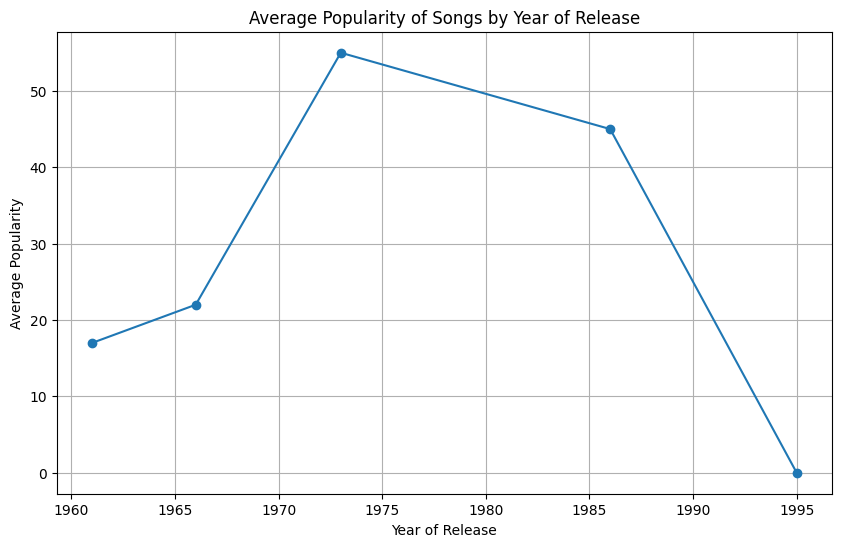

In [62]:
# Convert 'release_date' to datetime if it's not already
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Extract the year from 'release_date'
df['year'] = df['release_date'].dt.year

# Group by year and calculate the average popularity
yearly_popularity = df.groupby('year')['popularity'].mean().reset_index()

# Plot the yearly popularity trend
plt.figure(figsize=(10, 6))
plt.plot(yearly_popularity['year'], yearly_popularity['popularity'], marker='o')
plt.title('Average Popularity of Songs by Year of Release')
plt.xlabel('Year of Release')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.show()

In [65]:
import json

# Read the top10_hiphop.json file from HDFS
with hdfs_client.read('/kafka/hdfs/spotify_data/top10_hiphop.json', encoding='utf-8') as reader:
    hiphop_data_from_hdfs = reader.read()

# Convert the data_list to a JSON string
json_data = json.dumps(hiphop_data_from_hdfs, indent=4)
# Print the data read from HDFS
print(json_data)

"{\"key\": null, \"value\": \"{\\\"track_name\\\": \\\"GOTTI\\\", \\\"artist_names\\\": [\\\"6ix9ine\\\"], \\\"available_markets\\\": [], \\\"album_name\\\": \\\"Day69: Graduation Day\\\", \\\"release_date\\\": \\\"2018-04-10\\\", \\\"total_tracks\\\": 12, \\\"track_duration\\\": 166851, \\\"popularity\\\": 1}\", \"topic\": \"top10_hiphop\", \"partition\": 0, \"offset\": 0, \"timestamp\": 1730950841394}\n{\"key\": null, \"value\": \"{\\\"track_name\\\": \\\"Both Eyes Closed (feat. 2 Chainz and Young Dolph)\\\", \\\"artist_names\\\": [\\\"Gucci Mane\\\", \\\"2 Chainz\\\", \\\"Young Dolph\\\"], \\\"available_markets\\\": [\\\"AR\\\", \\\"AU\\\", \\\"AT\\\", \\\"BE\\\", \\\"BO\\\", \\\"BR\\\", \\\"BG\\\", \\\"CA\\\", \\\"CL\\\", \\\"CO\\\", \\\"CR\\\", \\\"CY\\\", \\\"CZ\\\", \\\"DK\\\", \\\"DO\\\", \\\"DE\\\", \\\"EC\\\", \\\"EE\\\", \\\"SV\\\", \\\"FI\\\", \\\"FR\\\", \\\"GR\\\", \\\"GT\\\", \\\"HN\\\", \\\"HK\\\", \\\"HU\\\", \\\"IS\\\", \\\"IE\\\", \\\"IT\\\", \\\"LV\\\", \\\"LT\\\", 

In [64]:
# Convert the JSON string to a list of dictionaries
hiphop_data_list = [json.loads(line) for line in hiphop_data_from_hdfs.split('\n') if line]

# Extract the 'value' field from each dictionary and convert it to a DataFrame
hiphop_df = pd.DataFrame([json.loads(item['value']) for item in hiphop_data_list])

# Print the DataFrame
print(hiphop_df)

                                          track_name  \
0                                              GOTTI   
1  Both Eyes Closed (feat. 2 Chainz and Young Dolph)   
2                                       Lucid Dreams   
3                          Where Ya At (feat. Drake)   
4                                                Hit   
5                                      Herside Story   
6                                             I Know   
7                               Soundtrack 2 My Life   
8                                         Patty Cake   
9                         Who Am I (What's My Name)?   

                          artist_names  \
0                            [6ix9ine]   
1  [Gucci Mane, 2 Chainz, Young Dolph]   
2                         [Juice WRLD]   
3                      [Future, Drake]   
4                  [NAV, Metro Boomin]   
5              [GoldLink, Hare Squead]   
6               [Big Sean, Jhené Aiko]   
7                           [Kid Cudi]   
8    

In [67]:
# Extract the most popular classical track
most_popular_classical = df[df['popularity'] == df['popularity'].max()]

# Extract the most popular hiphop track
most_popular_hiphop = hiphop_df[hiphop_df['popularity'] == hiphop_df['popularity'].max()]

# Display the most popular tracks
print("Most Popular Classical Track:")
print(most_popular_classical[['track_name', 'artist_names', 'popularity']])

print("\nMost Popular HipHop Track:")
print(most_popular_hiphop[['track_name', 'artist_names', 'popularity']])

Most Popular Classical Track:
       track_name               artist_names  popularity
22  I Got 5 On It  [Luniz, Michael Marshall]          73
36  I Got 5 On It  [Luniz, Michael Marshall]          73

Most Popular HipHop Track:
  track_name            artist_names  popularity
6     I Know  [Big Sean, Jhené Aiko]          71


Classical Dataset Summary:
                        release_date  total_tracks  track_duration  \
count                             14     38.000000       38.000000   
mean   1974-11-10 03:25:42.857142848     21.973684   284657.315789   
min              1961-01-01 00:00:00     10.000000    92600.000000   
25%              1966-01-01 00:00:00     15.000000   206826.000000   
50%              1973-01-01 00:00:00     17.000000   290440.000000   
75%              1986-01-01 00:00:00     21.000000   341693.000000   
max              1995-01-01 00:00:00     52.000000   467040.000000   
std                              NaN     13.330491   116277.337480   

       popularity         year  
count   38.000000    14.000000  
mean    24.236842  1974.857143  
min      0.000000  1961.000000  
25%      0.000000  1966.000000  
50%     17.000000  1973.000000  
75%     45.000000  1986.000000  
max     73.000000  1995.000000  
std     24.665803    12.421180  

HipHop Dataset Summary:
       total_tracks 

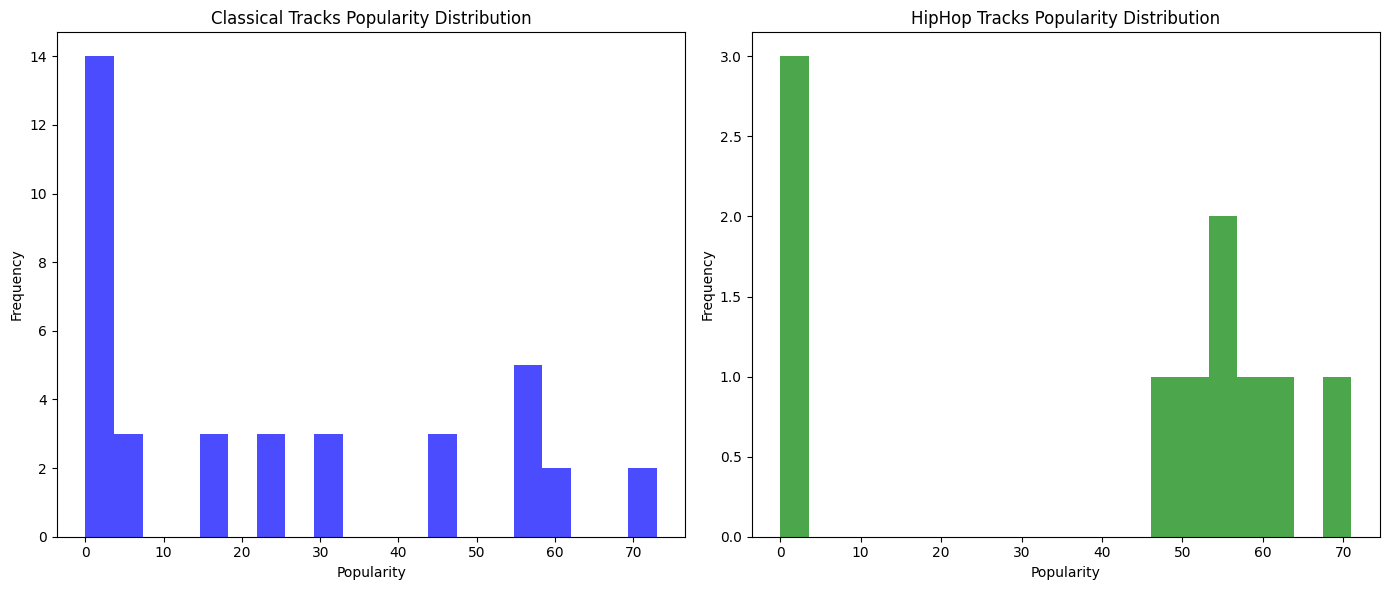


Classical Yearly Popularity:
     year  popularity
0  1961.0        17.0
1  1966.0        22.0
2  1973.0        55.0
3  1986.0        45.0
4  1995.0         0.0

HipHop Yearly Popularity:
     year  popularity
0  2009.0       55.00
1  2015.0       66.50
2  2017.0       52.75
3  2018.0        0.50


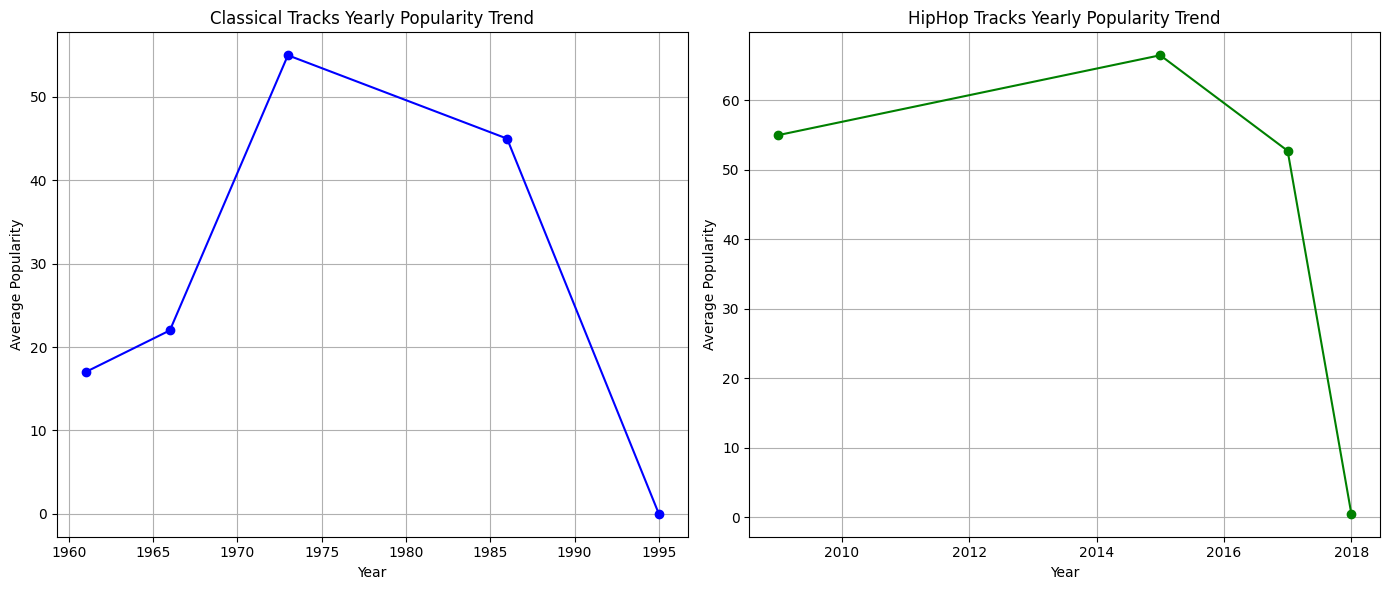

In [68]:
# Statistical summary of the classical dataset
classical_summary = df.describe()
print("Classical Dataset Summary:")
print(classical_summary)

# Statistical summary of the hiphop dataset
hiphop_summary = hiphop_df.describe()
print("\nHipHop Dataset Summary:")
print(hiphop_summary)

# Plotting the distribution of popularity for both datasets
plt.figure(figsize=(14, 6))

# Classical dataset popularity distribution
plt.subplot(1, 2, 1)
plt.hist(df['popularity'], bins=20, color='blue', alpha=0.7)
plt.title('Classical Tracks Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Frequency')

# HipHop dataset popularity distribution
plt.subplot(1, 2, 2)
plt.hist(hiphop_df['popularity'], bins=20, color='green', alpha=0.7)
plt.title('HipHop Tracks Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Average popularity by year for classical dataset
classical_yearly_popularity = df.groupby('year')['popularity'].mean().reset_index()
print("\nClassical Yearly Popularity:")
print(classical_yearly_popularity)

# Average popularity by year for hiphop dataset
hiphop_df['release_date'] = pd.to_datetime(hiphop_df['release_date'], errors='coerce')
hiphop_df['year'] = hiphop_df['release_date'].dt.year
hiphop_yearly_popularity = hiphop_df.groupby('year')['popularity'].mean().reset_index()
print("\nHipHop Yearly Popularity:")
print(hiphop_yearly_popularity)

# Plotting the yearly popularity trend for both datasets
plt.figure(figsize=(14, 6))

# Classical dataset yearly popularity trend
plt.subplot(1, 2, 1)
plt.plot(classical_yearly_popularity['year'], classical_yearly_popularity['popularity'], marker='o', color='blue')
plt.title('Classical Tracks Yearly Popularity Trend')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.grid(True)

# HipHop dataset yearly popularity trend
plt.subplot(1, 2, 2)
plt.plot(hiphop_yearly_popularity['year'], hiphop_yearly_popularity['popularity'], marker='o', color='green')
plt.title('HipHop Tracks Yearly Popularity Trend')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.grid(True)

plt.tight_layout()
plt.show()